In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)
# Chúng ta sẽ tạo hai nhóm dữ liệu, mỗi nhóm có 10 điểm, mỗi điểm dữ liệu có hai chiều để thuận tiện cho việc minh họa. Sau đó, tạo dữ liệu mở rộng bằng cách thêm 1 vào đầu mỗi điểm dữ liệu.
mean = [[2,2],[4,2]]
cov  = [[0.3,0.2],[0.2,0.3]]

N =10
X0 = np.random.multivariate_normal(mean[0],cov,N).T
X1 = np.random.multivariate_normal(mean[1],cov,N).T
#data
X  = np.concatenate((X0,X1),axis = 1)
print(X)
#nhãn ( 1, -1)
y = np.concatenate((np.ones((1,N)), -1*np.ones((1,N))), axis =1)
print(y)
# Xbar
Xbar = np.concatenate((np.ones((1,2*N)),X), axis =0)
print(Xbar)

[[2.22096057 2.70132234 3.08493823 2.02701417 2.73223639 1.21171968
  2.22920603 1.8637762  1.74682699 2.37191737 4.47403369 4.09281249
  4.22222334 4.58438569 4.74493118 3.6355797  5.19217738 3.51075436
  3.93784332 3.8787214 ]
 [2.19579728 3.43487375 2.70849736 1.47010441 2.32571583 2.23682627
  1.72925457 1.59716548 2.27230351 2.37595358 2.4040742  1.65061706
  2.11659863 2.05326933 2.67628604 2.63347726 3.2425902  2.11880111
  1.56029947 2.12126884]]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1.]]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [2.22096057 2.70132234 3.08493823 2.02701417 2.73223639 1.21171968
  2.22920603 1.8637762  1.74682699 2.37191737 4.47403369 4.09281249
  4.22222334 4.58438569 4.74493118 3.6355797  5.19217738 3.51075436
  3.93784332 3.8787214 ]
 [2.19579728 3.434873

In [109]:
# h(w, x): tính đầu ra khi biết đầu vào x và weights w.
# has_converged(X, y, w): kiểm tra xem thuật toán đã hội tụ chưa. Ta chỉ cần so sánh h(w, X) với ground truth y. Nếu giống nhau thì dừng thuật toán.
# perceptron(X, y, w_init): hàm chính thực hiện PLA.
def h (w, X):
    return np.sign(np.dot(w.T,X))
def has_converged(w,X,y):
    return np.array_equal(h(w,X),y)
def perceptron(Xbar,y, w_init):
    w = [w_init]
    N = Xbar.shape[1] # 20 cột
    d = Xbar.shape[0] # 3 hàng
    mis_points =[]
    while True :
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = Xbar [:,mix_id[i]].reshape(d,1) # (3,1)
            yi = y[0,mix_id[i]]
            if h(w[-1], xi)[0] != yi: #misclassified point ( cập nhật lại trọng số w =w + xi * yi)
                mis_points.append(mix_id[i])
                w_new = w[-1] + xi*yi
                w.append(w_new)
        if has_converged(w[-1],Xbar, y):
            break
    return (w, mis_points)
d = Xbar.shape[0]
w_init = np.random.randn(d,1)
(w, m) = perceptron(Xbar,y,w_init)
print( 'w:',w[-1])
print('mis_point:', len(m))
weight = w[-1]
w0 = weight[0][0]
w1 = weight[1][0]
w2 = weight[2][0]

w: [[ 3.73118467]
 [-4.62709307]
 [ 4.24267166]]
mis_point: 12


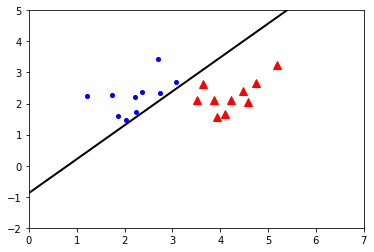

In [118]:
plt.plot(X0[0,:],X0[1,:],'b.', markersize =8)
plt.plot(X1[0,:],X1[1,:],'r^', markersize =8)
x11 ,x12 = 0, 7
# y0 = w1*x1 + w2*x2 + w0
plt.plot([x11, x12],[-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2],'k', linewidth =2)
plt.axis([0, 7, -2, 5])
plt.show()